<a href="https://colab.research.google.com/github/lmaier0402/Repository_1/blob/master/Copy_of_Titanic_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [3]:
import numpy as np
import pandas as pd

data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")

## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [4]:
# Code her
passengers = ["1st","2nd","3rd"]
joint_dis = pd.crosstab(df_titanic["class"], df_titanic.loc[df_titanic["class"].isin(passengers), "embarked"])
joint_dis

embarked,B,C,Q,S
class,,,,
1st,3,143,3,175
2nd,6,26,7,245
3rd,0,102,113,494


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [5]:
# Code here
conditional_c_giv_e = joint_dis.div(joint_dis.sum(axis=0), axis=1)
conditional_c_giv_e

embarked,B,C,Q,S
class,,,,
1st,0.333333,0.527675,0.024390,0.191466
2nd,0.666667,0.095941,0.056911,0.268053
3rd,0.000000,0.376384,0.918699,0.540481


In [6]:
conditional_e_giv_c = joint_dis.div(joint_dis.sum(axis=1), axis=0)
conditional_e_giv_c

embarked,B,C,Q,S
class,,,,
1st,0.009259,0.441358,0.009259,0.540123
2nd,0.021127,0.091549,0.024648,0.862676
3rd,0.000000,0.143865,0.159379,0.696756


In [ ]:
#69.7% of third class passengers embarked at Southamptonn
#54% of Southamptons passengers were third class

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

(array([0, 1, 2]), [Text(0, 0, '1st'), Text(1, 0, '2nd'), Text(2, 0, '3rd')])

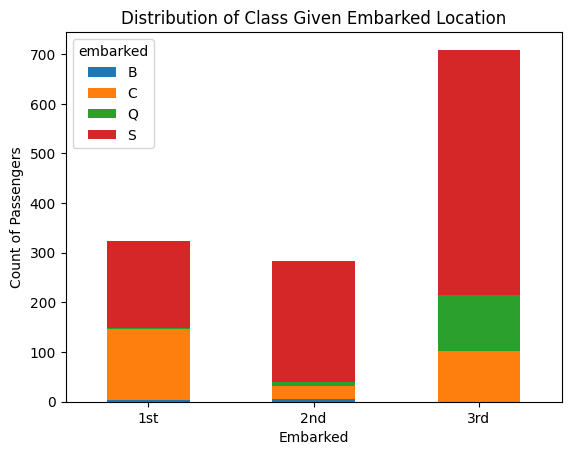

In [9]:
# Code here
import pandas as pd
from plotnine import ggplot, geom_point, aes, geom_boxplot
import matplotlib.pyplot as plt

joint_dis.plot(kind='bar', stacked=True)

plt.title('Distribution of Class Given Embarked Location')
plt.xlabel('Embarked')
plt.ylabel('Count of Passengers')
plt.xticks(rotation=0)